Import libraries.

In [1]:
import pandas as p
import numpy as n
from collections import Counter
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import adjustText
import pickle


Import pickled data.

In [2]:
data = p.read_pickle('corpus.pkl')
dtm = p.read_pickle('dtm.pkl')
dtm = dtm.transpose()
print(dtm)


speaker       Amy Klobuchar  Andrew Yang  Marianne Williamson  Tulsi Gabbard  \
aa                        1            0                    0              0   
aapi                      0            0                    0              0   
aaron                     0            0                    0              0   
abandoned                 0            0                    0              0   
abandoning                0            0                    0              0   
abated                    0            0                    0              0   
abc                       0            0                    0              0   
aberration                0            0                    0              0   
abhorrent                 0            0                    0              1   
abide                     0            0                    0              0   
ability                   0            1                    0              0   
able                     24            5

In [3]:
top_30 = {}
for col in dtm.columns:
    top = dtm[col].sort_values(ascending = False).head(30)
    top_30[col] = list(zip(top.index, top.values))


In [4]:
# Print the top 15 words said by each candidate
for candidate, top_words in top_30.items():
    print(candidate)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')
    

Amy Klobuchar
think, people, president, going, want, just, dont, make, said, thats, way, right, like, need
---
Andrew Yang
people, american, country, know, right, going, trump, president, money, way, need, americans, thats, like
---
Marianne Williamson
people, going, just, need, trump, say, policies, im, donald, talk, think, american, thats, dont
---
Tulsi Gabbard
people, war, country, president, like, american, change, need, regime, thats, trump, make, way, national
---
Bernie Sanders
people, country, got, going, healthcare, right, american, think, need, trump, america, president, million, year
---
Pete Buttigieg
president, people, just, going, right, american, country, got, like, think, im, need, way, weve
---
Kamala Harris
people, states, president, justice, need, america, united, going, plan, women, donald, trump, tell, issue
---
Michael Bloomberg
just, people, city, new, going, york, im, thats, think, weve, ive, got, dont, years
---
Cory Booker
people, president, country, going, i

In [5]:
# Look at the most common top words --> add them to the stop word list
# First, pull out the top 30 words for each candidate
words = []
for candidate in dtm.columns:
    top = [word for (word, count) in top_30[candidate]]
    for t in top:
        words.append(t)
words


['think',
 'people',
 'president',
 'going',
 'want',
 'just',
 'dont',
 'make',
 'said',
 'thats',
 'way',
 'right',
 'like',
 'need',
 'got',
 'country',
 'trump',
 'im',
 'say',
 'bring',
 'donald',
 'things',
 'know',
 'actually',
 'work',
 'time',
 'look',
 'america',
 'better',
 'ive',
 'people',
 'american',
 'country',
 'know',
 'right',
 'going',
 'trump',
 'president',
 'money',
 'way',
 'need',
 'americans',
 'thats',
 'like',
 'donald',
 'just',
 'jobs',
 'want',
 'say',
 'im',
 'economy',
 'work',
 'new',
 'fact',
 'communities',
 'home',
 'kids',
 'theyre',
 'month',
 'companies',
 'people',
 'going',
 'just',
 'need',
 'trump',
 'say',
 'policies',
 'im',
 'donald',
 'talk',
 'think',
 'american',
 'thats',
 'dont',
 'politics',
 'new',
 'love',
 'talking',
 'deep',
 'united',
 'billion',
 'states',
 'make',
 'plan',
 'healthcare',
 'economy',
 'party',
 'dollars',
 'great',
 'important',
 'people',
 'war',
 'country',
 'president',
 'like',
 'american',
 'change',
 'nee

In [6]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('people', 14),
 ('thats', 14),
 ('president', 13),
 ('going', 13),
 ('need', 12),
 ('trump', 12),
 ('think', 11),
 ('just', 11),
 ('make', 11),
 ('right', 11),
 ('country', 11),
 ('im', 11),
 ('want', 10),
 ('dont', 10),
 ('way', 10),
 ('know', 10),
 ('say', 9),
 ('like', 8),
 ('donald', 8),
 ('american', 8),
 ('time', 7),
 ('america', 7),
 ('got', 6),
 ('states', 6),
 ('sure', 6),
 ('work', 5),
 ('look', 5),
 ('ive', 5),
 ('united', 5),
 ('plan', 5),
 ('healthcare', 5),
 ('said', 4),
 ('things', 4),
 ('americans', 4),
 ('new', 4),
 ('bring', 3),
 ('economy', 3),
 ('fact', 3),
 ('war', 3),
 ('weve', 3),
 ('world', 3),
 ('let', 3),
 ('years', 3),
 ('believe', 3),
 ('actually', 2),
 ('money', 2),
 ('theyre', 2),
 ('companies', 2),
 ('change', 2),
 ('year', 2),
 ('tell', 2),
 ('medicare', 2),
 ('issue', 2),
 ('families', 2),
 ('city', 2),
 ('did', 2),
 ('fight', 2),
 ('stage', 2),
 ('able', 2),
 ('question', 2),
 ('better', 1),
 ('jobs', 1),
 ('communities', 1),
 ('home', 1),
 ('kids', 

In [7]:
# number of candidates
dtm.shape[1]


14

In [8]:
# If more than half of the candidates have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > dtm.shape[1]/2]
add_stop_words


['people',
 'thats',
 'president',
 'going',
 'need',
 'trump',
 'think',
 'just',
 'make',
 'right',
 'country',
 'im',
 'want',
 'dont',
 'way',
 'know',
 'say',
 'like',
 'donald',
 'american']

In [24]:
# Let's update our document-term matrix with the new list of stop words
# Read in cleaned data
data_clean = p.read_pickle('corpus.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words = stop_words)
data_cv = cv.fit_transform(data_clean.speeches)
data_stop = p.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
data_stop.index = data_clean.speaker
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")


In [10]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
wc = WordCloud(stopwords = stop_words, background_color = "white", colormap = "Dark2",
               max_font_size=150, random_state=42)


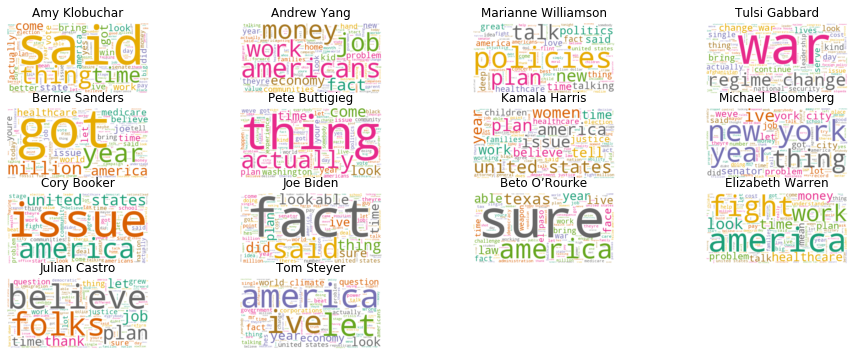

In [11]:
wc = WordCloud(stopwords = stop_words, background_color = "white", colormap = "Dark2",
               max_font_size=150, random_state=42)

full_names = dtm.columns
plt.rcParams['figure.figsize'] = [16, 6]
for index, candidate in enumerate(dtm.columns):
    wc.generate(data_clean.speeches[index])
    
    plt.subplot(4, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])


In [12]:
# Determine the vocabulary breadth of each candidate, by total number of unique words used.
unique_list = []
for candidate in dtm.columns:
    uniques = dtm[candidate].nonzero()[0].size
    unique_list.append(uniques)

data_vocabulary = p.DataFrame(
list(zip(full_names, unique_list)),
columns = ['Candidate', 'Vocabulary'])
data_vocabulary = data_vocabulary.sort_values(by = "Vocabulary", ascending = False)
data_vocabulary


,Candidate,Vocabulary
5,Pete Buttigieg,2749
9,Joe Biden,2520
0,Amy Klobuchar,2340
11,Elizabeth Warren,2238
4,Bernie Sanders,2085
8,Cory Booker,1711
1,Andrew Yang,1564
6,Kamala Harris,1531
10,Beto O’Rourke,1448
13,Tom Steyer,1288


There are wide disparities in vocabulary sizes of candidates.

Pete Buttigieg has the broadest vocabulary.
Of the 5 most successful candidates, Bernie Sanders has the smallest vocabulary.

In [13]:
total_words = []
for candidate in dtm.columns:
    total_words.append(dtm[candidate].sum())

data_total_words = p.DataFrame(
list(zip(dtm.columns, total_words)),
columns = ['candidate', 'total_words'])
data_total_words = data_total_words.set_index('candidate')
data_total_words


,total_words
candidate,
Amy Klobuchar,9941
Andrew Yang,4423
Marianne Williamson,1143
Tulsi Gabbard,2708
Bernie Sanders,10186
Pete Buttigieg,10733
Kamala Harris,4768
Michael Bloomberg,1956
Cory Booker,4948


In [14]:
data_words = data_vocabulary.set_index('Candidate').join(data.set_index('speaker'))
data_words = data_words.drop('speeches', axis = 1)
data_words = data_words.join(data_total_words)

data_words['WPM'] = data_words.total_words/data_words.speaking_time*60
data_words = data_words.sort_values(by = 'WPM', ascending = False)

data_words


,Vocabulary,speaking_time,total_words,WPM
Candidate,,,,
Julian Castro,1127,1534.0,2701,105.645372
Beto O’Rourke,1448,2002.0,3464,103.816184
Cory Booker,1711,3068.0,4948,96.766623
Tulsi Gabbard,1114,1690.0,2708,96.142012
Andrew Yang,1564,3149.0,4423,84.274373
Marianne Williamson,541,827.0,1143,82.926239
Amy Klobuchar,2340,7703.0,9941,77.432169
Tom Steyer,1288,3635.0,4673,77.133425
Pete Buttigieg,2749,8413.0,10733,76.545822


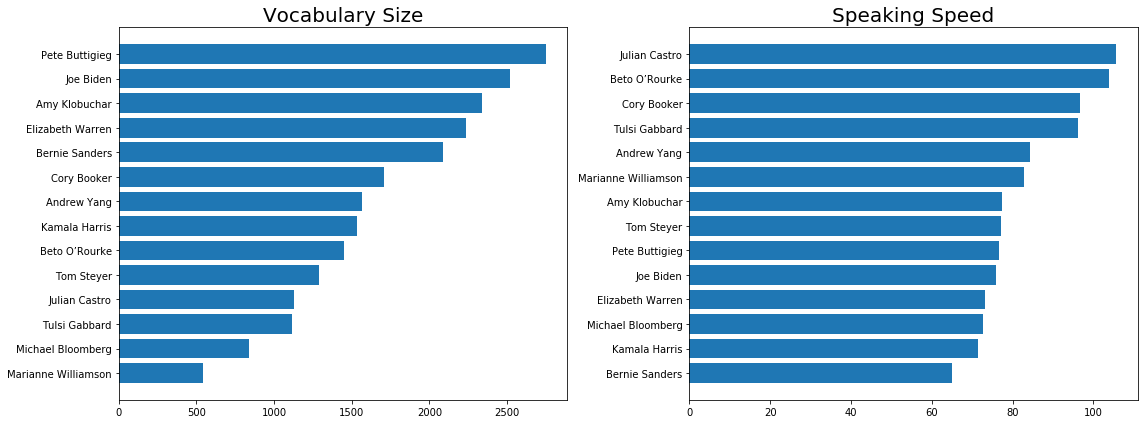

In [15]:
# Plots for vocabulary and speaking speed
y_position = n.arange(len(data_words))

data_words = data_words.sort_values(by = "Vocabulary")
plt.subplot(1, 2, 1)
plt.barh(y_position, data_words.Vocabulary, align = 'center')
plt.yticks(y_position, data_words.index)
plt.title("Vocabulary Size", fontsize = 20)

data_words = data_words.sort_values(by = "WPM")
plt.subplot(1, 2, 2)
plt.barh(y_position, data_words.WPM, align = 'center')
plt.yticks(y_position, data_words.index)
plt.title("Speaking Speed", fontsize = 20)

plt.tight_layout()
plt.show()


Findings

    Speaking Speed
Of the six candidates who speak the fastest, none were notably successful in the race.
Julian Castro spoke the fastest;
Bernie Sanders spoke the slowest.
Speaking slower seems like a leadership quality?

    Vocabulary
Candidates with broader vocabularies were more successful.
This relation is partially due to their being in the race longer.
Is this relation still predictive? 

How much do these candidates talk about Donald Trump?
Extra emphasis if they use his full name!

X-axis measure the number of uses of the word 'Donald' divided by the total number of words
Y-axis measure the number of uses of the word 'Trump' divided by the total number of words

In [16]:
# Most common words
Counter(words).most_common()


[('people', 14),
 ('thats', 14),
 ('president', 13),
 ('going', 13),
 ('need', 12),
 ('trump', 12),
 ('think', 11),
 ('just', 11),
 ('make', 11),
 ('right', 11),
 ('country', 11),
 ('im', 11),
 ('want', 10),
 ('dont', 10),
 ('way', 10),
 ('know', 10),
 ('say', 9),
 ('like', 8),
 ('donald', 8),
 ('american', 8),
 ('time', 7),
 ('america', 7),
 ('got', 6),
 ('states', 6),
 ('sure', 6),
 ('work', 5),
 ('look', 5),
 ('ive', 5),
 ('united', 5),
 ('plan', 5),
 ('healthcare', 5),
 ('said', 4),
 ('things', 4),
 ('americans', 4),
 ('new', 4),
 ('bring', 3),
 ('economy', 3),
 ('fact', 3),
 ('war', 3),
 ('weve', 3),
 ('world', 3),
 ('let', 3),
 ('years', 3),
 ('believe', 3),
 ('actually', 2),
 ('money', 2),
 ('theyre', 2),
 ('companies', 2),
 ('change', 2),
 ('year', 2),
 ('tell', 2),
 ('medicare', 2),
 ('issue', 2),
 ('families', 2),
 ('city', 2),
 ('did', 2),
 ('fight', 2),
 ('stage', 2),
 ('able', 2),
 ('question', 2),
 ('better', 1),
 ('jobs', 1),
 ('communities', 1),
 ('home', 1),
 ('kids', 

In [17]:
data_trump = dtm.transpose()[['donald', 'trump']]
data_trump = data_trump.join(data_words)
data_trump = data_trump.drop(['Vocabulary', 'speaking_time', 'WPM'], axis = 1)
data_trump.donald = data_trump.donald/data_trump.total_words
data_trump.trump = data_trump.trump/data_trump.total_words
data_trump = data_trump.drop('total_words', axis = 1)
data_trump

,donald,trump
speaker,,
Amy Klobuchar,0.004929,0.005331
Andrew Yang,0.006331,0.007235
Marianne Williamson,0.008749,0.011374
Tulsi Gabbard,0.003693,0.005908
Bernie Sanders,0.002062,0.006479
Pete Buttigieg,0.002702,0.004379
Kamala Harris,0.007341,0.007341
Michael Bloomberg,0.005112,0.006135
Cory Booker,0.004850,0.004446


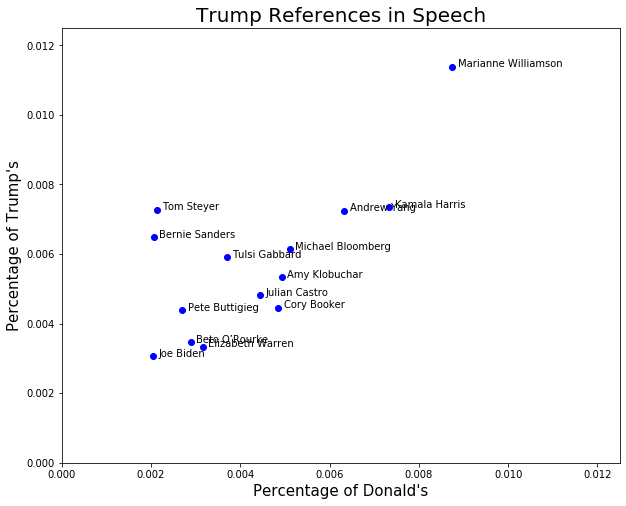

In [18]:
# Scatter Plot of our Findings!
plt.rcParams['figure.figsize'] = [10, 8]

for i, candidate in enumerate(data_trump.index):
    x = data_trump.donald.loc[candidate]
    y = data_trump.trump.loc[candidate]
    plt.scatter(x, y, color = 'blue')
    texts = plt.text(x + .00012, y, data_trump.index[i], fontsize = 10)
#    adjustText.adjust_text(texts = text)
    plt.xlim(0, .0125)
    plt.ylim(0, .0125)


plt.title('Trump References in Speech', fontsize = 20)
plt.xlabel('Percentage of Donald\'s', fontsize = 15)
plt.ylabel('Percentage of Trump\'s', fontsize = 15)
plt.show()




#    plt.title('Number of Bad Words Used in Routine', fontsize=20)
#plt.xlabel('Number of F Bombs', fontsize=15)
#plt.ylabel('Number of S Words', fontsize=15)

#plt.show()

    Findings

Marianne Williamson mentioned President Trump the most.
Joe Biden mentioned him the least.

Generally, successful candidates mentioned him less often.